In [41]:
#Import library yang diperlukan
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

**Path menuju directory data**

In [42]:
# Path untuk ke dataset
dataset_path = "/kaggle/input/new-plant-diseases-dataset/"

# Menemukan train directory
train_dir = None
for dirname, _, filenames in os.walk(dataset_path):
    if 'train' in dirname:
        train_dir = dirname
        break  
        
if train_dir:
    print(f"Directory training: {train_dir}")
else:
    print("Directory not found.")

Directory training: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


**Data Preprocessing**

In [43]:
#Training preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

Found 70295 files belonging to 38 classes.


In [44]:
#Validation Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

Found 70295 files belonging to 38 classes.


**Membuat Model**

In [45]:
# CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),

    # Block Pertama
    tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    # Block Kedua
    tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    # Block Ketiga
    tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    # Block Keempat
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    # Flatten dan Fully Connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(38, activation='softmax')  # Output layer
])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,024,710 (26.80 MB)

 Trainable params: 7,024,710 (26.80 MB)

 Non-trainable params: 0 (0.00 B)

**Compile Model**

In [47]:
# Compile model CNN
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

**Training Model**

In [48]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
   7/2197 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.0136 - loss: 7.1278

I0000 00:00:1734007945.549927     105 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4548 - loss: 2.0129

I0000 00:00:1734007995.358670     102 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.4549 - loss: 2.0125 - val_accuracy: 0.8906 - val_loss: 0.3732
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.8563 - loss: 0.4649 - val_accuracy: 0.9470 - val_loss: 0.1777
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.9187 - loss: 0.2616 - val_accuracy: 0.9754 - val_loss: 0.0853
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9460 - loss: 0.1650 - val_accuracy: 0.9738 - val_loss: 0.0780
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.9616 - loss: 0.1180 - val_accuracy: 0.9919 - val_loss: 0.0265


**Evaluasi Model**

In [49]:
#Accuracy Training Set
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9903 - loss: 0.0310
Training accuracy: 0.9918770790100098


In [50]:
#Akurasi Validation Set
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9914 - loss: 0.0264
Validation accuracy: 0.9918770790100098


In [51]:
# Menyimpan Model.h5
#model.save('pathify_model.h5')

In [52]:
# Menyimpan Model.keras
model.save('pathify_model.keras')

In [53]:
training_history.history

{'accuracy': [0.6429475545883179,
  0.8763211965560913,
  0.925499677658081,
  0.9506793022155762,
  0.9642364382743835],
 'loss': [1.2473446130752563,
  0.39971959590911865,
  0.2333979457616806,
  0.14973118901252747,
  0.11069528758525848],
 'val_accuracy': [0.890618085861206,
  0.9469805955886841,
  0.9753751754760742,
  0.9738388061523438,
  0.9918770790100098],
 'val_loss': [0.37321773171424866,
  0.17765027284622192,
  0.08533703535795212,
  0.07800794392824173,
  0.026524469256401062]}

In [54]:
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

In [55]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


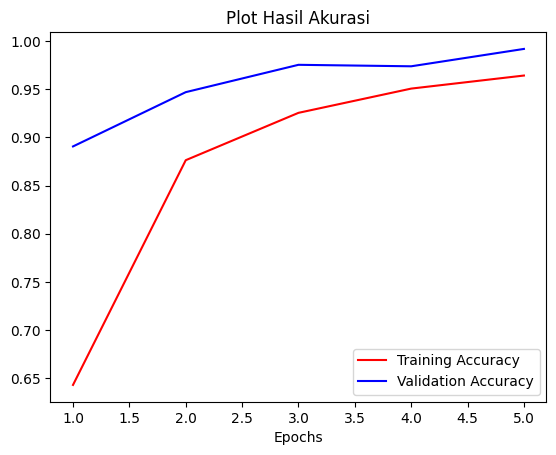

In [57]:
# Visualisasi Hasil Akurasi
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Plot Hasil Akurasi')
plt.legend()
plt.show()

In [58]:
class_name = validation_set.class_names

In [59]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

Found 17572 files belonging to 38 classes.


In [60]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step


In [61]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [62]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [63]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [65]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.92      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

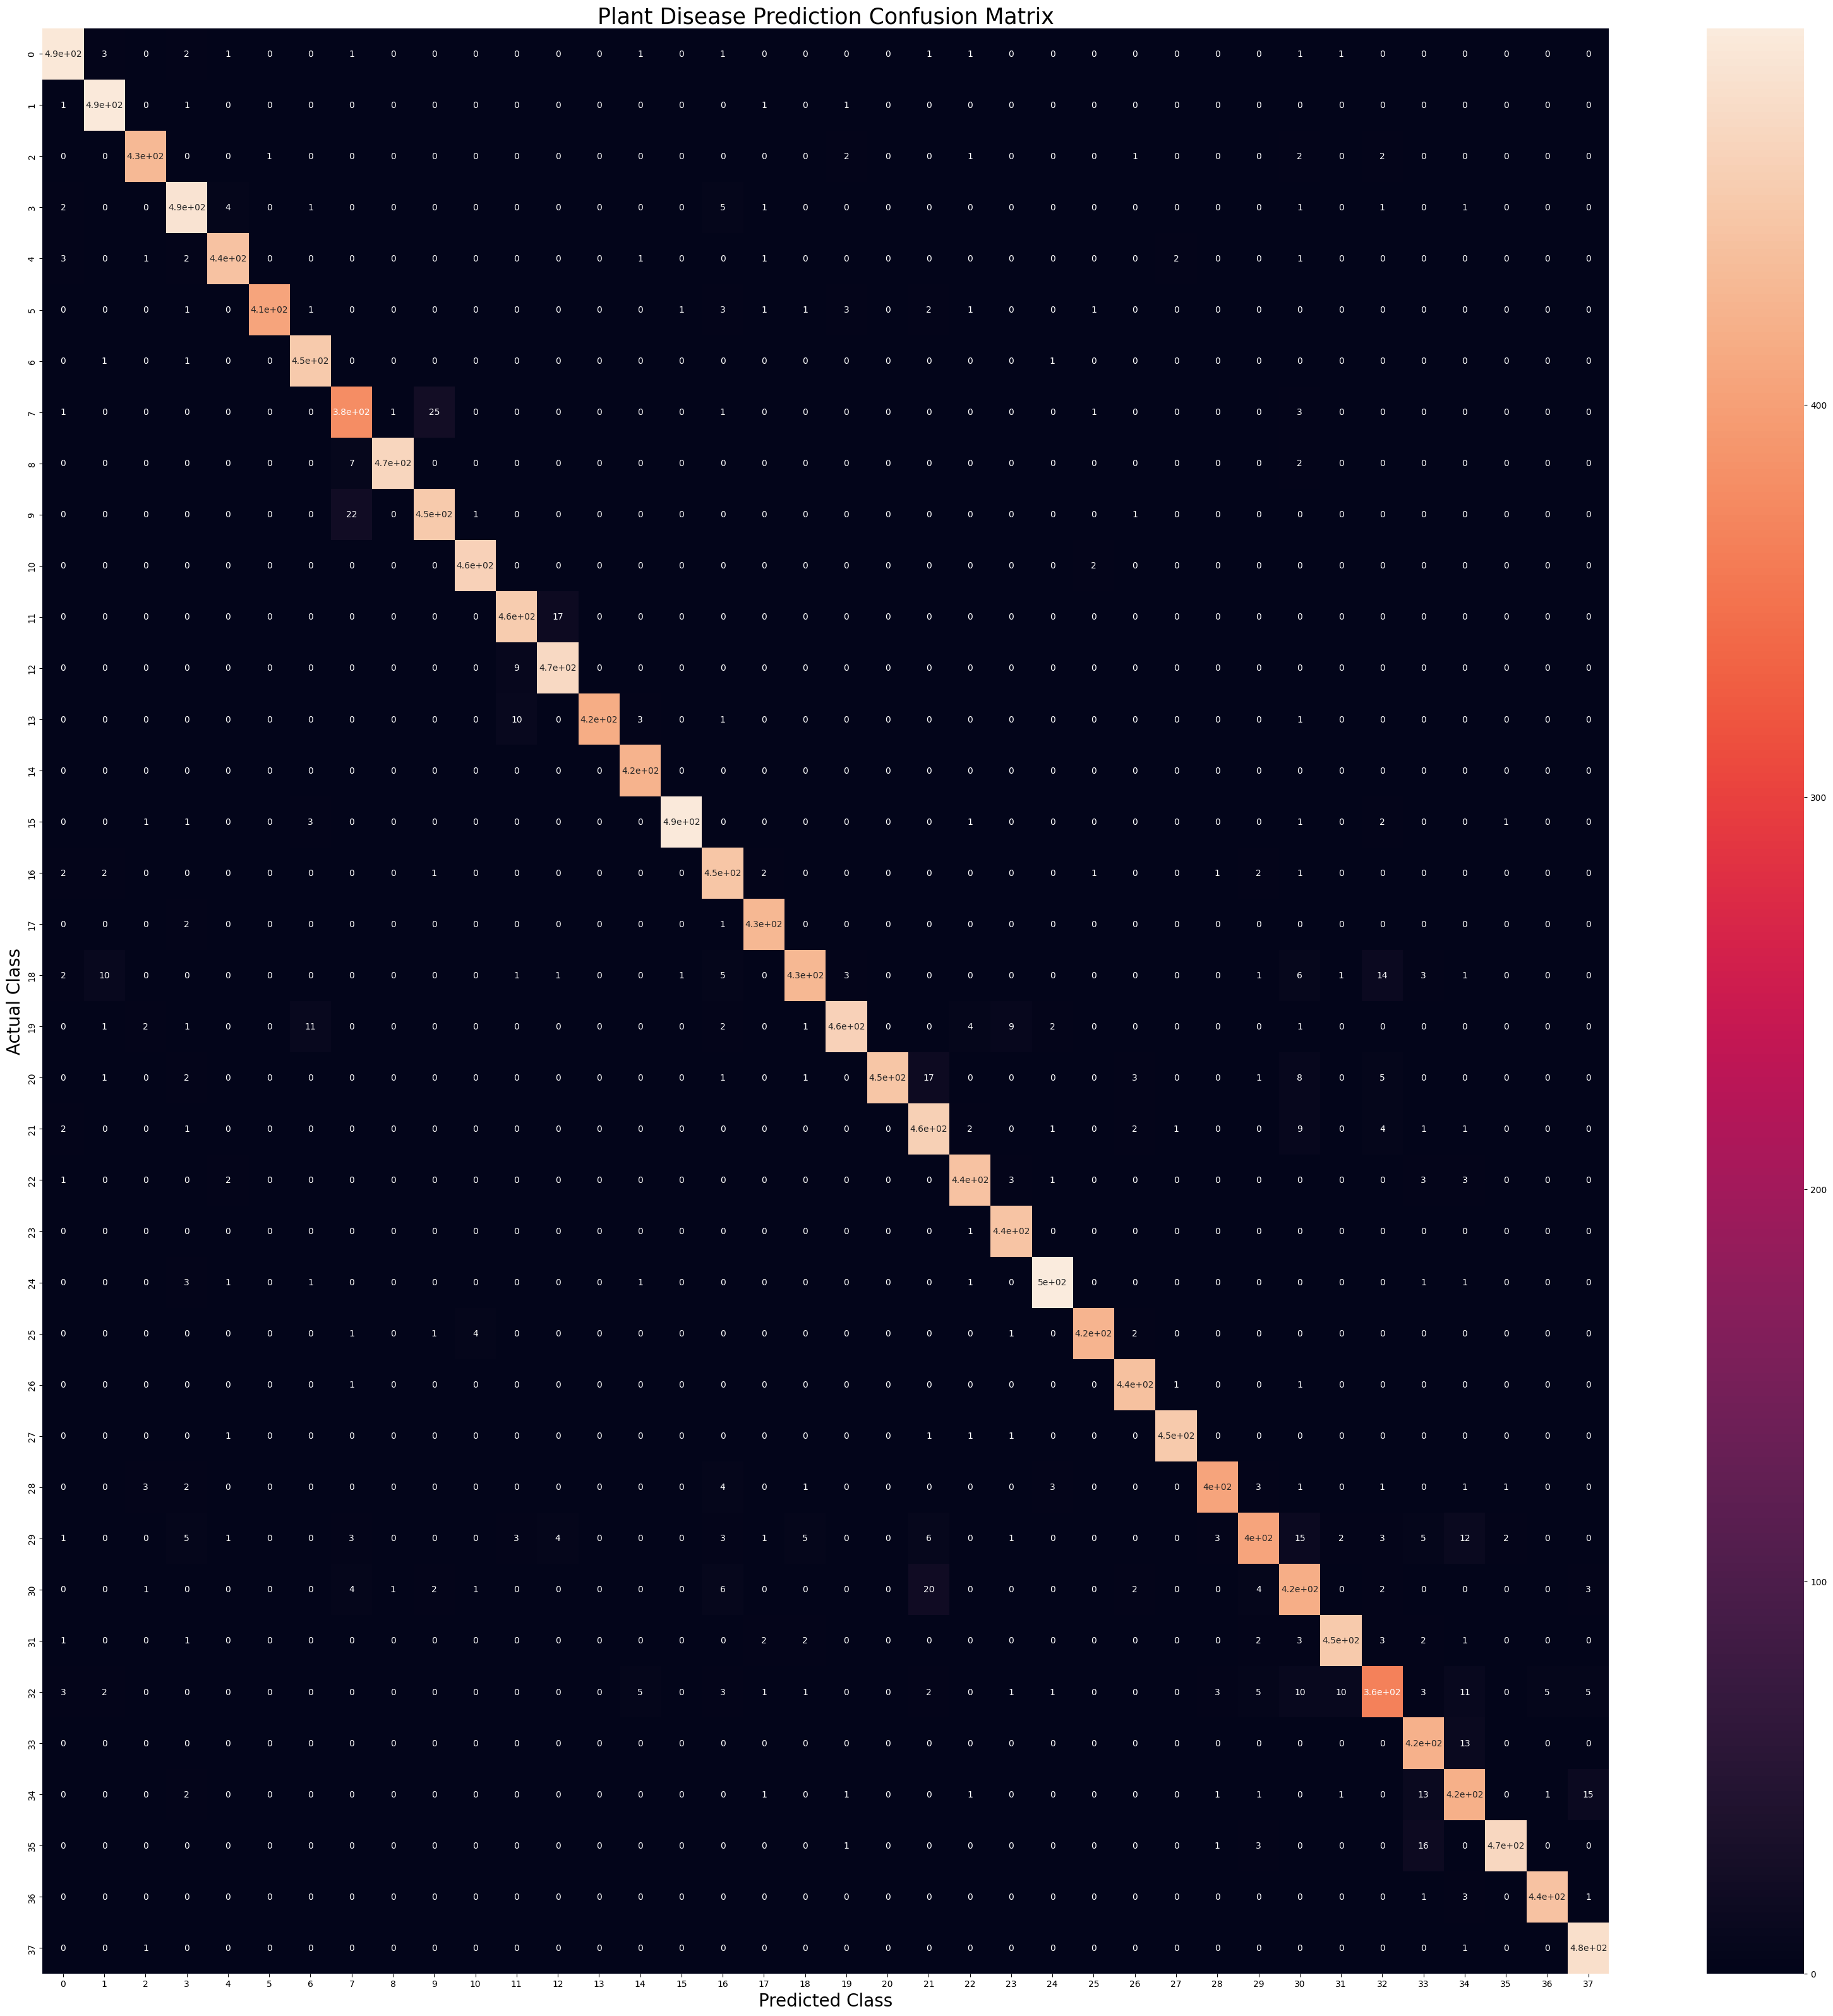

In [66]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
# Processing Test Set
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [69]:
# Load Model
model = tf.keras.models.load_model('pathify_model.keras')

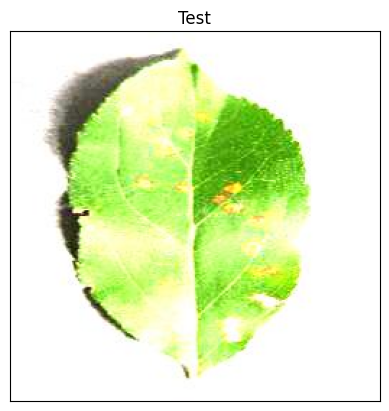

In [70]:
# Visualisasi dan Test Prediksi
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 

# Mendisplay gambar
plt.imshow(img)
plt.title('Test')
plt.xticks([])
plt.yticks([])
plt.show()

In [71]:
# Konfigurasi Untuk Prediksi
input_arr = tf.keras.preprocessing.image.img_to_array(img)  
input_arr = cv2.resize(input_arr, (128, 128))  
input_arr = input_arr / 255.0  
input_arr = np.expand_dims(input_arr, axis=0) 

# Prediksi
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


In [72]:
print(predictions)

[[0.02920499 0.02211207 0.03380078 0.0279862  0.02378616 0.03072751
  0.02329696 0.03034695 0.02529277 0.02931394 0.02657425 0.02575992
  0.0238602  0.02462346 0.02420189 0.02814677 0.02786748 0.02660659
  0.02452031 0.02698138 0.02310973 0.02724004 0.02410411 0.02496311
  0.02388101 0.02754651 0.02603997 0.02373841 0.02899466 0.02881286
  0.0327472  0.02601646 0.02332425 0.02464778 0.02525172 0.02668112
  0.02374119 0.02414925]]


In [73]:
result_index = np.argmax(predictions) #Mengembalikan index dari kemungkinan terbesar
print(result_index)

2


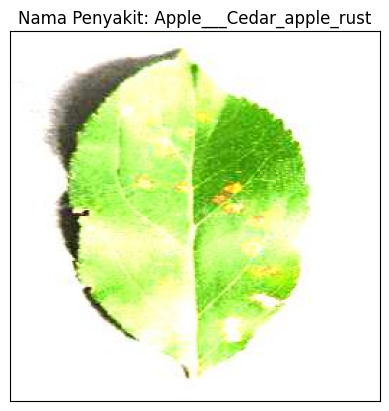

In [74]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Nama Penyakit: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

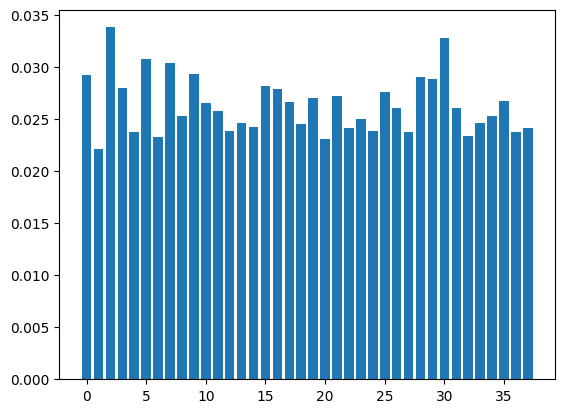

In [75]:
plt.bar(range(len(predictions[0])), predictions[0])
plt.show()

In [76]:
# Convert model ke TFLite
TFLITE_MODEL = "pathify_tflite.tflite"


# Concrete function
run_model = tf.function(lambda x : model(x))

# Save concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert model ke standard TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

W0000 00:00:1734009086.965677      30 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1734009086.965713      30 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


28104872

In [77]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Path ke model TFLite
tflite_model_path = 'pathify_tflite.tflite'

# Membuat interpreter
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()  

In [78]:
# Ambil detail tensor input dan output dengan interpreter
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

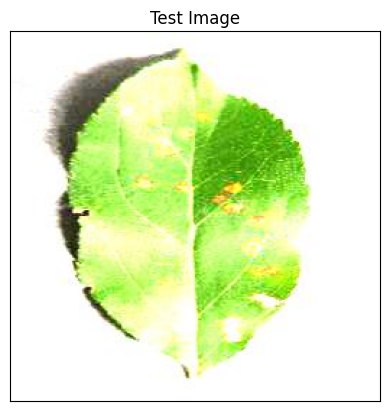

In [79]:
# Baca gambar dan lakukan pra-pemrosesan
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Resize gambar sesuai dimensi input model
input_arr = cv2.resize(img, (128, 128)) 
input_arr = input_arr / 255.0  
input_arr = np.expand_dims(input_arr, axis=0)  

In [80]:
# Konversi input ke tipe data FLOAT32
input_arr = input_arr.astype(np.float32)

# Berikan data input ke interpreter
interpreter.set_tensor(input_details[0]['index'], input_arr)

# Jalankan model
interpreter.invoke()

# Ambil hasil prediksi
predictions = interpreter.get_tensor(output_details[0]['index'])
print("Predictions:", predictions)

# Interpretasikan hasil prediksi
result_index = np.argmax(predictions)
print("Index prediksi:", result_index)

# Tentukan nama penyakit berdasarkan indeks
class_name = validation_set.class_names
model_prediction = class_name[result_index]

Predictions: [[0.029207   0.02211321 0.03380046 0.02798592 0.02378674 0.03072598
  0.0232974  0.03034602 0.02529418 0.02931342 0.02657388 0.02575907
  0.02385992 0.02462388 0.02420295 0.02814507 0.02786795 0.0266074
  0.02452    0.02698165 0.02311066 0.02723909 0.02410516 0.02496275
  0.02388105 0.02754667 0.02604055 0.02373931 0.02899451 0.0288104
  0.03274764 0.02601475 0.02332453 0.0246468  0.02525166 0.02667901
  0.02374267 0.02415072]]
Index prediksi: 2


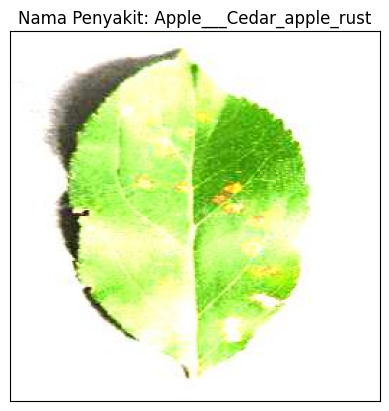

In [81]:
plt.imshow(img)
plt.title(f"Nama Penyakit: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()